## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.6 kB/s 
     |████████████████████████████████| 2.9 MB 34.0 MB/s 
     |████████████████████████████████| 454 kB 48.5 MB/s 
     |████████████████████████████████| 3.0 MB 33.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/archive/new/train'
valid_path = '/content/drive/My Drive/archive/new/valid'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234553344/234545216 [==============================] - 3s 0us/step


In [6]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/archive/new/train/*')

In [8]:
folders

['/content/drive/My Drive/archive/new/train/Tomato___Early_blight',
 '/content/drive/My Drive/archive/new/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/archive/new/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/archive/new/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/archive/new/train/Tomato___Target_Spot',
 '/content/drive/My Drive/archive/new/train/Tomato___Late_blight',
 '/content/drive/My Drive/archive/new/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/My Drive/archive/new/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/archive/new/train/Tomato___healthy',
 '/content/drive/My Drive/archive/new/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/archive/new/train/cats',
 '/content/drive/My Drive/archive/new/train/person',
 '/content/drive/My Drive/archive/new/train/dogs',
 '/content/drive/My Drive/archive/new/train/car',
 '/content/drive/My Drive/archive/new/train/houses',
 '/content/drive

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/archive/new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 11005 images belonging to 16 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/archive/new/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5838 images belonging to 16 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
 19/344 [>.............................] - ETA: 42:27 - loss: 8.7978 - accuracy: 0.4309

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


 39/344 [==>...........................] - ETA: 41:08 - loss: 6.8947 - accuracy: 0.5345

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


344/344 [==============================] - 4468s 13s/step - loss: 4.1268 - accuracy: 0.7416 - val_loss: 5.5622 - val_accuracy: 0.7867
Epoch 2/25
344/344 [==============================] - 328s 954ms/step - loss: 2.4645 - accuracy: 0.8627 - val_loss: 3.2770 - val_accuracy: 0.8638
Epoch 3/25
344/344 [==============================] - 318s 923ms/step - loss: 2.2294 - accuracy: 0.8961 - val_loss: 4.9020 - val_accuracy: 0.8553
Epoch 4/25
344/344 [==============================] - 316s 917ms/step - loss: 2.0020 - accuracy: 0.9048 - val_loss: 3.5561 - val_accuracy: 0.8929
Epoch 5/25
344/344 [==============================] - 319s 927ms/step - loss: 1.7550 - accuracy: 0.9244 - val_loss: 4.5453 - val_accuracy: 0.8796
Epoch 6/25
344/344 [==============================] - 323s 939ms/step - loss: 1.6278 - accuracy: 0.9327 - val_loss: 5.1182 - val_accuracy: 0.8881
Epoch 7/25
344/344 [==============================] - 323s 939ms/step - loss: 1.6003 - accuracy: 0.9335 - val_loss: 4.4410 - val_accurac

In [17]:
import matplotlib.pyplot as plt

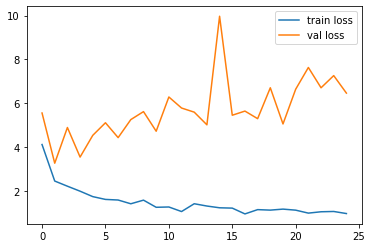

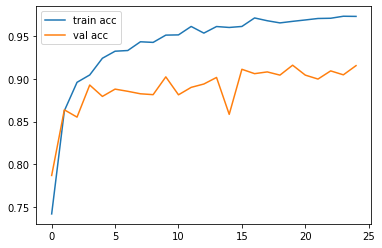

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[5.3846088e-29, 2.2531559e-23, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.1657728e-08, 1.2172376e-20, 1.0000000e+00, 1.5230057e-28],
       [4.8872598e-30, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.3303991e-33, 0.0000000e+00],
       [4.5714924e-16, 8.6781859e-11, 1.3235285e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.4839473e-28, 1.0000000e+00, 3.3122518e-22, 6.6293510e-21],
       [1.0000000e+00, 5.0101860e-30, 0.0000000e+00, 0.0000000e+00],
       [7.8975147e-36, 2.7945514e-23, 1.0478895e-18, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.2099686e-36],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [5.2780553e-25, 1.6846226e-15, 1.0000000e+00, 1.5684442e-16],
       [0.0000000e+00, 3.1915728e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 2, 2, 1, 0, 3, 1, 1, 0, 3, 1, 2, 2, 3, 2, 3, 3], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'